# Q1. What is Ridge Regression, and how does it differ from ordinary least squares regression?

Ridge regression is a linear model for regression like Linear regression (Ordinary least squares). But there is a difference that helps make the Ridge regression more regularized and thus avoid the problem of overfitting. The ordinary least squares model seeks to find the coefficients that minimize the mean squared error. On the other hand, Ridge Regression tries to find the coefficients that minimize the mean squared error and wants the magnitude of coefficients to be as small as possible. That means each feature should have a little effect on the outcome. 

Ridge Regression 

idge regression is a linear regression technique that introduces a penalty term to the loss function. The penalty term is proportional to the square of the magnitude of the model’s coefficients, effectively shrinking them towards zero. This has the effect of reducing the variance in the model, as well as reducing the likelihood of overfitting to the training data.

Penalty equivalent to the square of the magnitude of the coefficients.

Helps to reduce model complexity & multi-collinearity.

Leads to low bias and low variance.

L = ||y – Xw||^2 + alpha * ||w||^2

where:

L is the loss function
y is the target variable
X is the input data
w is the model’s coefficients
alpha is the regularization parameter

Regularization Term:

OLS Regression: In OLS regression, the goal is to minimize the sum of the squared residuals, which can lead to overfitting when the model has too many features or when those features are highly correlated (multicollinearity).
Ridge Regression: In Ridge Regression, an additional term is added to the cost function. This term is proportional to the square of the magnitude of the coefficients. The inclusion of this term, also known as the "L2 regularization term," penalizes large coefficients and helps to reduce their impact on the model.
Impact on Coefficients:

OLS Regression: In OLS regression, coefficients are calculated to exactly fit the training data. This can lead to large coefficient values when dealing with multicollinearity, and this might lead to unstable or erratic predictions.
Ridge Regression: Ridge Regression encourages smaller coefficients by penalizing large ones. The regularization term pulls the coefficients towards zero, which can help in reducing multicollinearity issues and producing more stable predictions.
Bias-Variance Trade-off:

OLS Regression: OLS tends to have low bias and high variance, which means it can overfit the training data.
Ridge Regression: Ridge Regression introduces a bias in the estimation of coefficients but reduces variance. This bias-variance trade-off often leads to better generalization performance on unseen data.
Feature Selection:

OLS Regression: OLS does not inherently perform feature selection. It considers all available features for making predictions.
Ridge Regression: Due to the regularization term, Ridge Regression can shrink the coefficients of less important features towards zero, effectively performing feature selection by reducing their impact on the model.
Hyperparameter:

OLS Regression: OLS does not have any hyperparameters to tune.
Ridge Regression: Ridge Regression has a hyperparameter called the regularization strength (usually denoted as λ or alpha) that needs to be selected. This hyperparameter controls the trade-off between fitting the data and regularizing the coefficients.

# Q2. What are the assumptions of Ridge Regression?

Here are the key assumptions of Ridge Regression:

Linearity: The relationship between the independent variables and the dependent variable should be linear. This means that the change in the dependent variable is proportional to the change in the independent variables.

Independence of Errors: The errors (residuals) should be independent of each other. This assumption ensures that there is no systematic pattern or correlation in the residuals.

Homoscedasticity: The variance of the residuals should be constant across all levels of the independent variables. In other words, the spread of the residuals should be roughly the same across the range of predicted values.

Normality of Residuals: The residuals should be normally distributed. This assumption is important for hypothesis testing and for constructing confidence intervals and prediction intervals.

Multicollinearity: While Ridge Regression is designed to handle multicollinearity to some extent, it's still beneficial to have low levels of multicollinearity among the independent variables. High multicollinearity can make coefficient estimates unstable and difficult to interpret.

# Q3. How do you select the value of the tuning parameter (lambda) in Ridge Regression?

Grid Search:

One common approach is to perform a grid search over a range of lambda values. You specify a range of lambda values and then evaluate the model's performance (typically using cross-validation) for each lambda value. The lambda that yields the best performance, often measured using a metric like mean squared error (MSE) or cross-validated R-squared, is chosen as the optimal lambda.

Cross validation:

The tuning parameter lambda is chosen by cross validation. When lambda is small, the result is essentially the least squares estimates. As lambda increases, shrinkage occurs so that variables that are at zero can be thrown away.

Regularization Paths:

Some libraries, like scikit-learn for Python, offer functions that compute regularization paths. These paths show how the coefficients change for different lambda values. You can then choose a lambda value that balances good model fit and coefficient shrinkage.

In [83]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate some example data
X, y = make_regression(n_samples=100, n_features=10, noise=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge Regression model
ridge = Ridge()

# Set up the grid of lambda values for the grid search
param_grid = {'alpha': np.logspace(-6, 6, 13)}  # Vary lambda from 1e-6 to 1e6

# Perform grid search using cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best lambda from the grid search
best_lambda = grid_search.best_params_['alpha']

# Train the Ridge model with the best lambda
best_ridge = Ridge(alpha=best_lambda)
best_ridge.fit(X_train, y_train)

# Predict on the test set
y_pred = best_ridge.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Best lambda: {best_lambda}")
print(f"Mean squared error: {mse}")


Best lambda: 1e-06
Mean squared error: 0.2566425538653102


# Q4. Can Ridge Regression be used for feature selection? If yes, how?

Yes, Ridge Regression can be used for feature selection to some extent. While Ridge Regression doesn't perform explicit feature selection like some other techniques (e.g., Lasso Regression), it indirectly addresses feature selection by shrinking the coefficients of less important features towards zero. This leads to some features having coefficients that are effectively zero, which means they have little impact on the model's predictions.

Ridge regression is popular because it uses regularization for making predictions and regularization is intended to resolve the problem of overfitting. We mainly find that overfitting is where the size of data is very large and ridge regression works by penalizing the coefficient of features and it also minimizes the errors in prediction. 

In [88]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Generate some example data
X, y = make_regression(n_samples=100, n_features=10, noise=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge Regression model with a specific lambda (alpha)
# You should choose the lambda using cross-validation or another method
ridge = Ridge(alpha=1.0)

# Fit the Ridge model on the training data
ridge.fit(X_train, y_train)

# Get the coefficients of the model
coefficients = ridge.coef_

# Print the coefficients for each feature
for feature, coef in enumerate(coefficients):
    print(f"Feature {feature}: {coef}")

# Predict on the test set
y_pred = ridge.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")


Feature 0: 17.045875272526878
Feature 1: 53.29276754480164
Feature 2: 5.079403617883001
Feature 3: 62.71484431111293
Feature 4: 92.10990436144442
Feature 5: 69.67754095495897
Feature 6: 85.91702749513377
Feature 7: 9.835681227045972
Feature 8: 3.244279427544565
Feature 9: 69.64991813408301
Mean squared error: 12.652111318755058


# Q5. How does the Ridge Regression model perform in the presence of multicollinearity?

Multicollinearity can create inaccurate estimates of the regression coefficients, inflate the standard errors of the
regression coefficients, deflate the partial t-tests for the regression coefficients, give false, nonsignificant, p-values, and degrade the predictability of the model (and that’s just for starters).

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity,In ridge regression, the penalty is the sum of the squares of the coefficients. L2 Regularization aka Ridge Regularization — This add regularization terms in the model which are function of square of coefficients of parameters. Coefficient of parameters can approach to zero but never become zero.

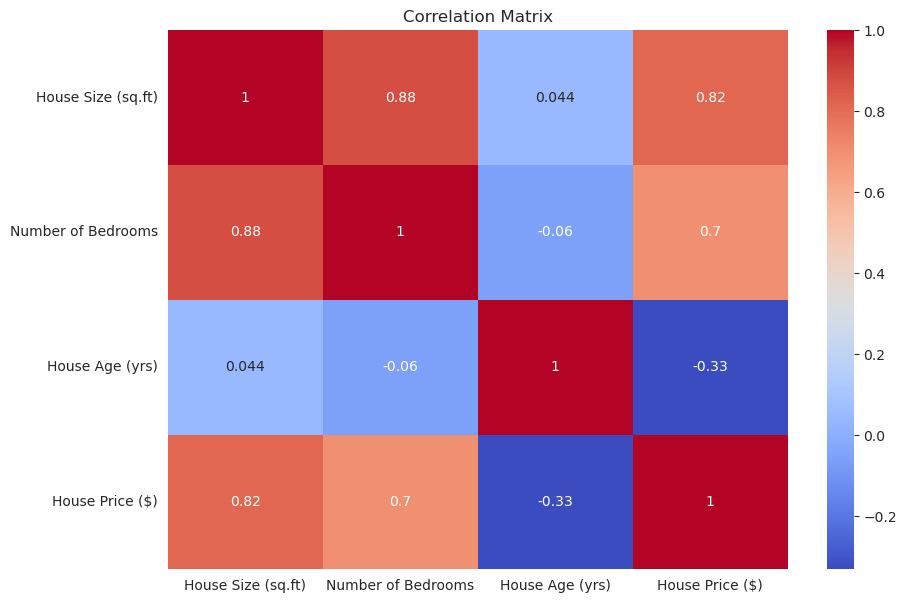

In [89]:
# Import necessary functions
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sample dataset
np.random.seed(42)
house_size = np.random.randint(1800, 2600, 100)
num_bedrooms = (house_size / 500).astype(int)
house_age = np.random.randint(1, 10, 100)
house_price = 5000 + 100 * house_size + -5000 * num_bedrooms + -3000 * house_age + np.random.normal(0, 10000, 100)

data = pd.DataFrame({
    'House Size (sq.ft)': house_size,
    'Number of Bedrooms': num_bedrooms,
    'House Age (yrs)': house_age,
    'House Price ($)': house_price
})

# Calculate and visualize correlations
correlation_matrix = data.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [90]:
# Import necessary functions
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
features = data.drop("House Price ($)", axis=1)
vif_data = pd.DataFrame()
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif_data["Feature"] = features.columns
vif_data

,VIF,Feature
0,171.553652,House Size (sq.ft)
1,157.601331,Number of Bedrooms
2,4.275736,House Age (yrs)


The high VIF values for 'House Size' and 'Number of Bedrooms' confirm our earlier observation from the correlation matrix: these two variables are highly correlated and might be causing multicollinearity issues in our regression model. 

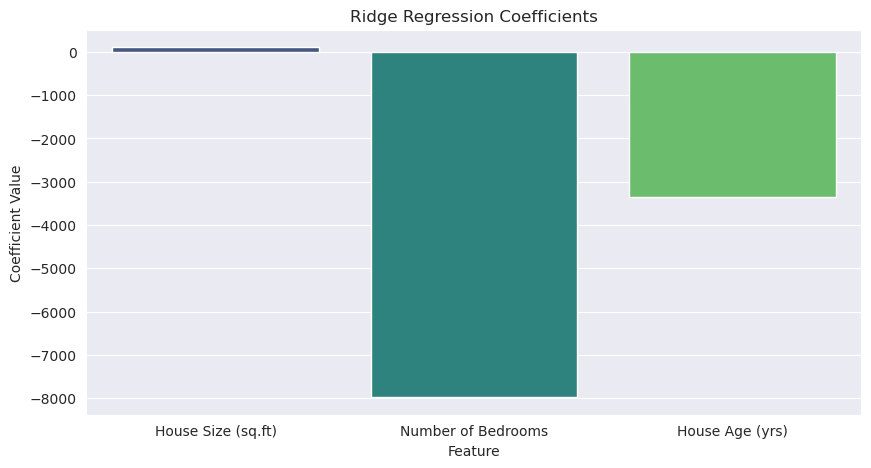

In [91]:
from sklearn.linear_model import Ridge

# Split data into features and target
X = data.drop("House Price ($)", axis=1)
y = data["House Price ($)"]

# Implement Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# Visualize coefficients
coefs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge.coef_
})

plt.figure(figsize=(10, 5))
sns.barplot(data=coefs, x='Feature', y='Coefficient', palette='viridis')
plt.title('Ridge Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.show()

House Size (sq.ft) 📐: The coefficient is positive, indicating that as the house size increases, the house price tends to increase. 🏠💹

Number of Bedrooms 🛌: The coefficient is negative. This means that, holding other factors constant, an increase in the number of bedrooms would decrease the house price. This might seem counterintuitive, but remember that this variable is highly correlated with 'House Size'. The negative coefficient could be Ridge Regression's way of balancing the effects of 'House Size' and 'Number of Bedrooms' due to multicollinearity. 🤹‍♂️🔀

House Age (yrs) ⏳: The coefficient is negative, implying that older houses tend to have lower prices, consistent with our correlation matrix.

# Q6. Can Ridge Regression handle both categorical and continuous independent variables?

Yes, Ridge Regression can handle both categorical and continuous independent variables, but some preprocessing steps are necessary to incorporate categorical variables into the regression model. Ridge Regression is originally designed for continuous variables, so categorical variables need to be appropriately transformed or encoded before being used in the regression.

Here's how you can handle both types of variables:

Continuous Variables:
For continuous variables, no special preprocessing is needed. You can directly use them as they are in Ridge Regression.

Categorical Variables:
Categorical variables need to be transformed into numerical values before being used in Ridge Regression. There are several methods to achieve this:

One-Hot Encoding: One-hot encoding is a common approach for dealing with categorical variables. Each category is transformed into a binary column where a '1' represents the presence of that category, and '0' represents its absence. This approach creates new columns, so it increases the dimensionality of the dataset.

Label Encoding: Another approach is label encoding, where categories are replaced with integer values. However, label encoding might introduce an ordinal relationship among categories that might not actually exist, potentially leading to incorrect interpretations.

Ordinal Encoding: This approach is suitable for categorical variables with ordered categories. Similar to label encoding, ordinal encoding assigns integer values to categories, preserving the order of the categories.

Normalization:
After encoding categorical variables, it's important to normalize all variables (both continuous and encoded categorical) so that they are on the same scale. Ridge Regression is sensitive to the scale of variables, and normalizing them prevents any feature from dominating the regularization process due to its scale.

Tuning Lambda:
When using both continuous and categorical variables, you'll need to choose an appropriate value for the tuning parameter (lambda or alpha) through methods like cross-validation. The choice of lambda will impact the regularization applied to all variables, both continuous and encoded categorical.

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Generate some example data
X, y = make_regression(n_samples=100, n_features=5, noise=0.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge Regression model
ridge = Ridge(alpha=1.0)

# Create a pipeline with standardization and Ridge Regression
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('ridge', ridge)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:",mse)


Mean squared error: 3.6971850672905546


# Q7. How do you interpret the coefficients of Ridge Regression?

In ordinary multiple linear regression, we use a set of p predictor variables and a response variable to fit a model of the form:
Y=β0​+β1​X1​+β2​X2​+⋯+βp​Xp​+ϵ

where:

Y: The response variable
Xj​: The $j$th predictor variable
βj​: The average effect on Y of a one unit increase in Xj​, holding all other predictors fixed
ϵ: The error term

The values for β0​,β1​,β2​,…,βp​ are chosen using the least square method, which minimizes the sum of squared residuals (RSS):
RSS=∑(yi​−y^​i​)^2

where:

∑: A greek symbol that means sum
yi: The actual response value for the $i$th observation
y^i: The predicted response value based on the multiple linear regression model

However, when the predictor variables are highly correlated then multicollinearity can become a problem. This can cause the coefficient estimates of the model to be unreliable and have high variance.

One way to get around this issue without completely removing some predictor variables from the model is to use a method known as ridge regression, which instead seeks to minimize the following:
    
 Cost=RSS+λ ∑(βj^2)

where:

RSS stands for Residual Sum of Squares, which is the same as in simple linear regression.

λ (lambda) is the regularization parameter, also known as the tuning parameter or the penalty parameter. It controls the strength of regularization.

βj is the coefficient of the jth feature.

where j ranges from 1 to p and λ≥0. This second term in the equation is known as a shrinkage penalty. When λ=0, this penalty term has no effect and ridge regression produces the same coefficient estimates as least squares. However, as λ approaches infinity, the shrinkage penalty becomes more influential and the ridge regression coefficient estimates approach zero. In general, the predictor variables that are least influential in the model will shrink towards zero the fastest 

The regularization term λ∑βj^2 penalizes the magnitude of the coefficients. As λ increases, the impact of the penalty becomes stronger, and the coefficients are shrunk towards zero.

# Q8. Can Ridge Regression be used for time-series data analysis? If yes, how?

Yes, Ridge Regression can be used for time-series data analysis. Ridge Regression is a variation of linear regression that adds a regularization term to the cost function. This term helps to reduce the impact of multicollinearity among the independent variables and can result in more stable and robust models.

It’s important to note that time-series data often exhibits temporal dependencies, and special care must be taken when splitting the data for cross-validation or model evaluation. Additionally, other techniques such as differencing or transformation may be necessary to ensure that the data meets the assumptions of linear regression.

In summary, Ridge Regression can be a useful tool for time-series data analysis, but it’s important to carefully preprocess the data and properly evaluate the model to ensure its validity and effectiveness.